In [56]:
%pylab
%matplotlib inline

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


/home/march/anaconda2/envs/py3/lib/python3.5/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [70]:
import pandas as pd
import numpy as np
import scipy.io as sio
import scipy.signal as scs
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [164]:
import glob

# Trabajo Práctico 2

## Ejercicio 1

In [148]:
p01 = sio.loadmat('dataset/S01.mat')

In [149]:
type(p01)

dict

In [150]:
p01_mat = p01['data']

In [151]:
DURACION = 30 * 60  # s
DUR_EPOCH = 1.54  # s
FREQ_SAMPLE = 250  # hz
N_ELECTRODOS = 256 
N_ESTIMULO = 1200
dur_sample = 1 / float(FREQ_SAMPLE)  # s
cant_samples_epoch = DUR_EPOCH / dur_sample
print('Cant samples x epoch: {}'.format(int(cant_samples_epoch)))

Cant samples x epoch: 385


In [152]:
p01_mat.shape

(657, 256, 201)

Interpretamos como: epochs x electrodo x samples

    Consultar
   
   
### 1.a: Media en electrodos 8, 44, 80, 131, 185 y fft con frecuencias en eje Y y trials en eje X

In [153]:
recorte = p01_mat[:, [8,44,80,131,185], :]
promedio = np.mean(recorte, axis=1)

In [154]:
promedio.shape

(657, 201)

<function __main__.f>

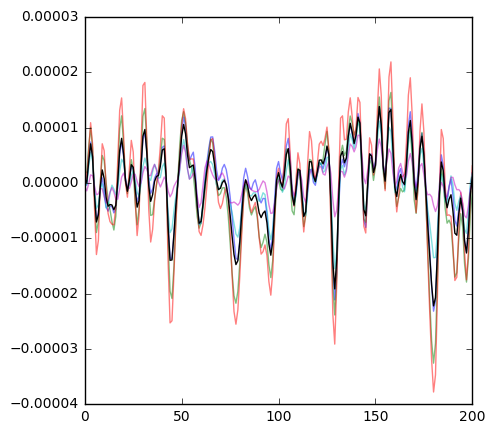

In [155]:
def f(epoch):
    plt.figure(figsize=(5, 5))
    for i in range(5):
        plot(recorte[epoch, i, :], alpha=0.5)
    plot(promedio[epoch, :], color='black') 
interact(f, epoch=(0, 20))

In [156]:
f, Pxx = scs.welch(promedio)

/home/march/anaconda2/envs/py3/lib/python3.5/site-packages/scipy/signal/spectral.py:772: UserWarning: nperseg = 256, is greater than input length = 201, using nperseg = 201
  'using nperseg = {1:d}'.format(nperseg, x.shape[-1]))


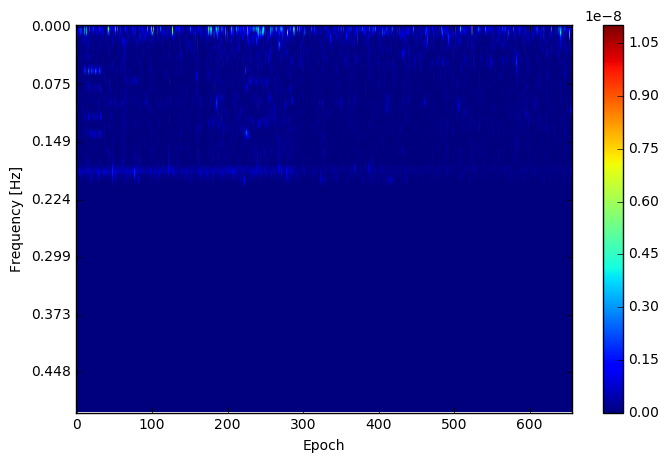

In [163]:
plt.figure(figsize=(8, 5))
imshow(Pxx.T, aspect='auto')
tick_select = range(0, len(f), 15)
tick_labels = ['{:.3f}'.format(x) for x in f[tick_select]]
yticks(tick_select, tick_labels)
xlabel('Epoch')
ylabel('Frequency [Hz]')
colorbar()

No se puede observar mucho en este caso. Probamos promediar todos los sujetos.

Para no tener que abrir todas las matrices, vamos a usar una matriz de _epoch_ x _samples_ como acumulador en la que vamos a sumar los valores de cada matriz. Además vamos a contar para cada _epoch_ cuantos valores se sumaron de forma de saber como promediar.

In [165]:
todas_las_matrices = glob.glob('dataset/*.mat')

In [221]:
electrodos_selec = [8, 44, 80, 131, 185]
contador_suma = np.zeros(0)
matriz_base = np.zeros((0,201))
for nombre_matriz in todas_las_matrices:
    data = sio.loadmat(nombre_matriz)['data']
    recorte = data[:, electrodos_selec, :]
    promedio = np.mean(recorte, axis=1)
    
    assert(promedio.shape[1] == 201)
    
    # Caso donde la nueva matriz tiene más épocas
    if (promedio.shape[0] > contador_suma.shape[0]): 
        tam_ant = contador_suma.shape[0]
        nuevo_contador = np.zeros(promedio.shape[0])  # Creo un nuevo arreglo de contadores del nuevo tamaño
        nuevo_contador[:tam_ant] = contador_suma # Actualizo los valores viejos en la región importante
        contador_suma = nuevo_contador 
        
        nueva_matriz = np.zeros((promedio.shape[0], 201))  # Creo una nueva matriz del nuevo tamaño
        nueva_matriz[0:matriz_base.shape[0], :] = matriz_base  # Actualizo la región importante
        matriz_base = nueva_matriz
        
    matriz_base[0:promedio.shape[0], :] += promedio  # Sumo los valores del sujeto en su región
    contador_suma[0:promedio.shape[0]] += np.ones(promedio.shape[0])  # Sumo uno a cada epoch actualizado

In [191]:
reshape_contador_suma = contador_suma.reshape((contador_suma.shape[0], 1))
promedio_gral = matriz_base / reshape_contador_suma

(1596, 201)


Ellipsis

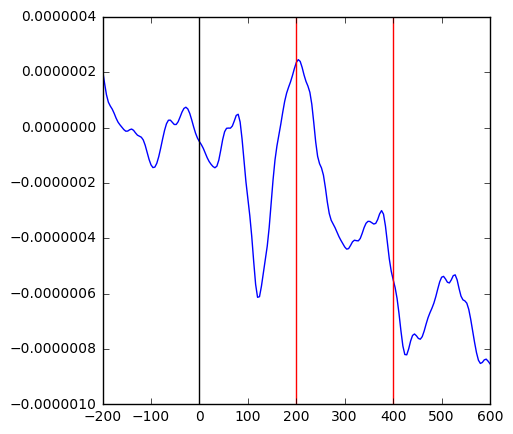

In [220]:
print(promedio_gral.shape)
plot(np.arange(201) * dur_sample * 1000 - 200, promedio_gral.mean(axis=0))
axvline(0, color='black')
axvline(200, color='red')
axvline(400, color='red')
...

In [192]:
f, Pxx = scs.welch(promedio_gral)

/home/march/anaconda2/envs/py3/lib/python3.5/site-packages/scipy/signal/spectral.py:772: UserWarning: nperseg = 256, is greater than input length = 201, using nperseg = 201
  'using nperseg = {1:d}'.format(nperseg, x.shape[-1]))


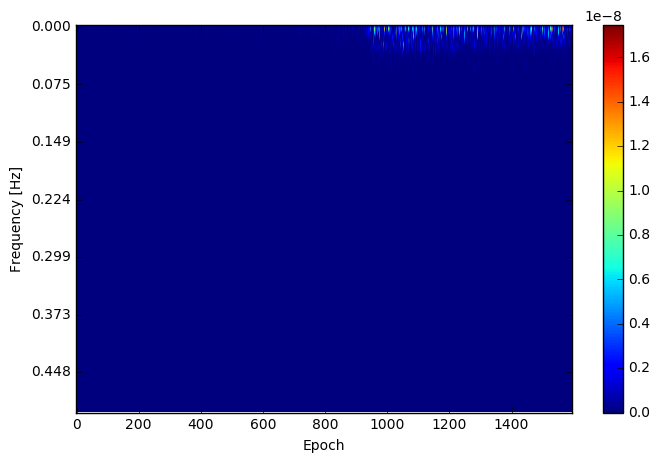

In [193]:
plt.figure(figsize=(8, 5))
imshow(Pxx.T, aspect='auto')
tick_select = range(0, len(f), 15)
tick_labels = ['{:.3f}'.format(x) for x in f[tick_select]]
yticks(tick_select, tick_labels)
xlabel('Epoch')
ylabel('Frequency [Hz]')
colorbar()

In [197]:
for nombre_matriz in sorted(todas_las_matrices):
    data = sio.loadmat(nombre_matriz)['data']
    print(nombre_matriz, data.shape)

dataset/P01.mat (894, 256, 201)
dataset/P02.mat (687, 256, 201)
dataset/P03.mat (700, 256, 201)
dataset/P04.mat (1596, 256, 201)
dataset/P05.mat (857, 256, 201)
dataset/P06.mat (944, 256, 201)
dataset/P07.mat (947, 256, 201)
dataset/P08.mat (901, 256, 201)
dataset/P09.mat (539, 256, 201)
dataset/P10.mat (931, 256, 201)
dataset/S01.mat (657, 256, 201)
dataset/S02.mat (407, 256, 201)
dataset/S03.mat (809, 256, 201)
dataset/S04.mat (746, 256, 201)
dataset/S05.mat (697, 256, 201)
dataset/S06.mat (769, 256, 201)
dataset/S07.mat (789, 256, 201)
dataset/S08.mat (800, 256, 201)
dataset/S09.mat (628, 256, 201)
dataset/S10.mat (767, 256, 201)
